# E-commerce Customer Profile Project

## Project Overview
This project focuses on cleaning, transforming, and analyzing e-commerce transaction data to create a unified customer profile database. By applying data preprocessing techniques and customer segmentation methods, we'll transform raw transaction data into actionable customer insights that can drive targeted marketing strategies.


## Business Context
Understanding customer behavior is crucial for e-commerce businesses. By creating unified customer profiles and segmenting customers based on their purchasing patterns, businesses can:
- Target marketing efforts more effectively
- Personalize customer experiences
- Identify high-value customers
- Develop retention strategies for at-risk customers
- Optimize inventory management based on product preferences


## Data Source
For this project I'm using the UCI Online Retail dataset, which contains actual transactions from a UK-based online retailer specializing in unique all-occasion gifts. The dataset covers transactions occurring between 01/12/2010 and 09/12/2011.


## Project Workflow

### 1. Data Understanding & Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/e-commerce-data/data.csv', encoding='latin-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [7]:
# Examine column types and missing values:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Data Quality Issues:
1. Missing CustomerID for ~25% of transactions
2. InvoiceDate stored as strings instead of datetime
3. CustomerID stored as floats with decimal points
4. Extreme outliers in Quantity (-80,995 to 80,995) and UnitPrice (-11,062 to 38,970)
5. Return transactions (negative quantities)

### 2. Data Cleaning

In [9]:
# Let's fix data types:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['CustomerID'] = df['CustomerID'].fillna(0).astype(str).str.replace('.0', '').astype(int)
df.loc[df['CustomerID'] == 0, 'CustomerID'] = np.nan

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# Identify Return Transactions:
returns = df[df['Quantity'] < 0]
print(f"Number of return transactions: {len(returns)}")

Number of return transactions: 10624


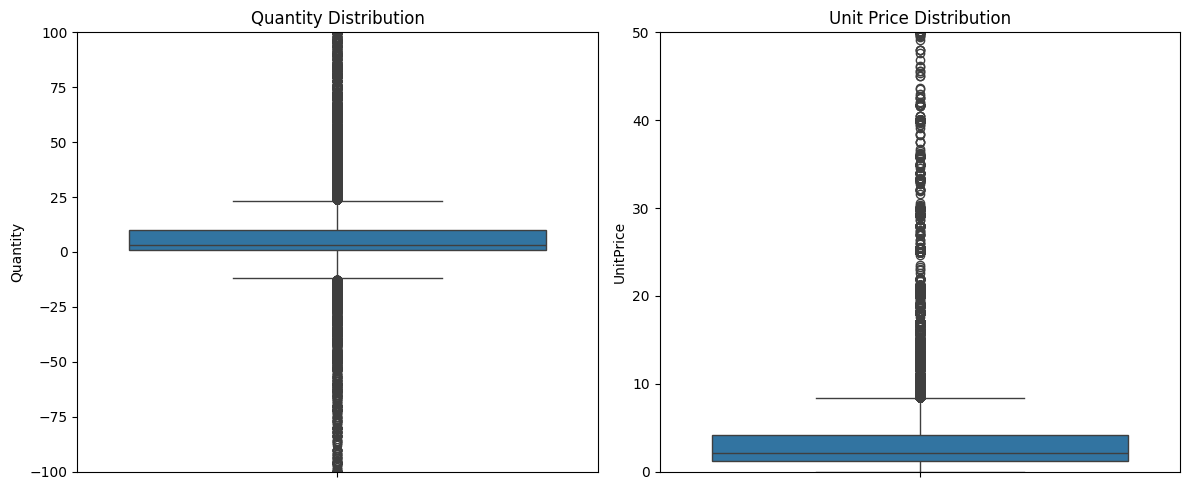

In [13]:
# Let's visualize the distribution of Quantity and UnitPrice to identify outliers:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Quantity Distribution')
plt.ylim(-100, 100)  

plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'])
plt.title('Unit Price Distribution')
plt.ylim(0, 50)  
plt.tight_layout()
plt.show()

The boxplots clearly show that both Quantity and UnitPrice have extreme outliers that would distort our analysis. Let's create a cleaned dataset with reasonable value ranges


In [14]:
df_clean = df.copy()

In [ ]:
qty_mask = (df_clean['Quantity'] >= -100) & (df_clean['Quantity'] <= 100)
print(f"Percentage of transactions with reasonable quantities: {qty_mask.mean()*100:.2f}%")

price_mask = (df_clean['UnitPrice'] > 0) & (df_clean['UnitPrice'] <= 100)
print(f"Percentage of transactions with reasonable prices: {price_mask.mean()*100:.2f}%")

df_clean = df_clean[qty_mask & price_mask]
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} records ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")

# Verify the distribution is now reasonable
print("\nCleaned Quantity statistics:")
print(df_clean['Quantity'].describe())
print("\nCleaned Unit Price statistics:")
print(df_clean['UnitPrice'].describe())

Percentage of transactions with reasonable quantities: 99.00%
Percentage of transactions with reasonable prices: 99.34%
Original dataset size: 541909
Cleaned dataset size: 533338
Removed 8571 records (1.58%)

Cleaned Quantity statistics:
count    533338.000000
mean          7.705590
std          12.710064
min        -100.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         100.000000
Name: Quantity, dtype: float64

Cleaned Unit Price statistics:
count    533338.000000
mean          3.335525
std           3.916508
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max         100.000000
Name: UnitPrice, dtype: float64


In [18]:
# Let's calculate the total amount for each transaction:
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 3. Exploratory Data Analysis

In [20]:
# Let's examine where our customers are located:
country_transactions = df_clean.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
print(country_transactions.head(10))

Country
United Kingdom    20735
Germany             593
France              452
EIRE                346
Belgium             119
Spain               102
Netherlands          89
Switzerland          73
Australia            60
Portugal             59
Name: InvoiceNo, dtype: int64


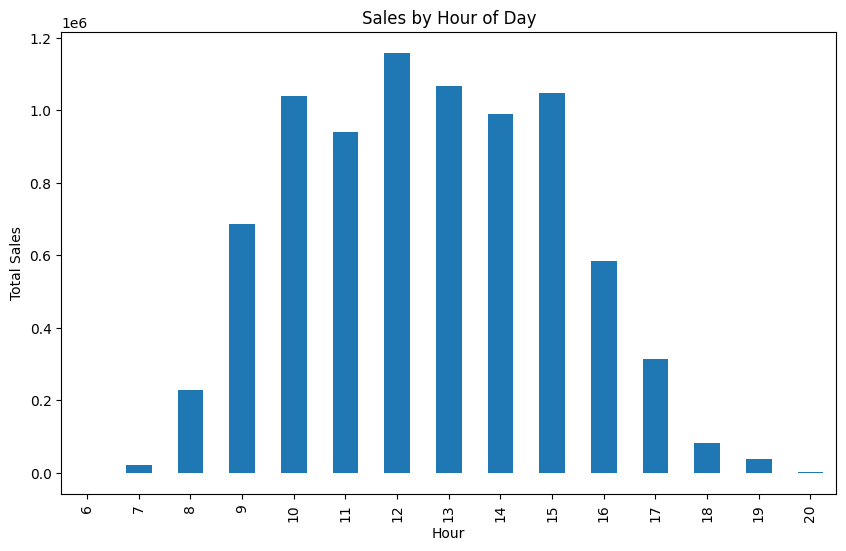

In [ ]:
# Let's analyze when customers are making purchases:

df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
df_clean['Month'] = df_clean['InvoiceDate'].dt.month


plt.figure(figsize=(10, 6))
hourly_sales = df_clean.groupby('Hour')['TotalAmount'].sum()
hourly_sales.plot(kind='bar')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()

- Peak sales occur at 12:00
- Sales follow a typical business day curve (8-17)
- Very little activity occurs after 19:00 and before 07:00
- The sales pattern suggests a business-oriented customer base rather than purely consumer


In [23]:
# Let's identify the most popular products:
top_products = df_clean.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)
print(top_products.head(10))

StockCode  Description                       
85099B     JUMBO BAG RED RETROSPOT               31268
85123A     WHITE HANGING HEART T-LIGHT HOLDER    24143
84879      ASSORTED COLOUR BIRD ORNAMENT         22701
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     21783
21212      PACK OF 72 RETROSPOT CAKE CASES       18672
22178      VICTORIAN GLASS HANGING T-LIGHT       18668
20725      LUNCH BAG RED RETROSPOT               18029
22197      POPCORN HOLDER                        17642
47566      PARTY BUNTING                         15786
23084      RABBIT NIGHT LIGHT                    14957
Name: Quantity, dtype: int64


- This results suggests a focus on gift products and home decor items

### 4. Customer Profile Creation

In [24]:
# First, let's separate transactions with customer IDs:
df_with_customers = df_clean[~df_clean['CustomerID'].isna()].copy()
print(f"Transactions with customer IDs: {len(df_with_customers)} ({len(df_with_customers)/len(df_clean)*100:.2f}%)")

Transactions with customer IDs: 401661 (75.31%)


In [26]:
# Now we'll create RFM (Recency, Frequency, Monetary) metrics for each customer:
max_date = df_clean['InvoiceDate'].max()


rfm = df_with_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                             # Frequency
    'TotalAmount': 'sum'                                # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'MonetaryValue'
})

rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,1,7,4060.40
12348.0,74,4,1195.08
12349.0,18,1,1457.55
12350.0,309,1,334.40
12352.0,35,8,1545.41


RFM analysis helps you identify which customers to invest in, which to nurture, and which are less critical to business results. Each of its components reflects a key aspect of customer behavior:

#### Recency: How recently a customer has made a purchase.
Indicates engagement and potential interest. Customers who have purchased recently are more likely to respond to marketing efforts and promotions.
#### Frequency: How often a customer makes a purchase.
Measures loyalty and ongoing engagement. Frequent buyers have greater attachment to the business and can be targeted with loyalty programs or special offers.
#### Monetary Value: How much a customer spends.
Reflects customer value and profitability. High spenders are valuable for driving revenue and can be rewarded with exclusive perks.

### 5. Customer Segmentation using RFM Analysis

In [30]:
# Create quintiles for each RFM metric (5 is best, 1 is worst)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])  # Note: for Recency, lower is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combine scores into a single RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12347.0,1,7,4060.40,5,4,5,545
12348.0,74,4,1195.08,2,4,4,244
12349.0,18,1,1457.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112
12352.0,35,8,1545.41,3,5,4,354


In [31]:
# Define customer segments based on RFM scores
def segment_customer(r, f, m):
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 3 and f >= 1 and m >= 2:
        return 'Potential Loyalists'
    elif r >= 4 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At Risk Customers'
    elif r <= 1 and f >= 2 and m >= 2:
        return 'Cant Lose Them'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    else:
        return 'Others'

In [34]:
rfm['Segment'] = rfm.apply(lambda x: segment_customer(
    int(x['R_Score']), int(x['F_Score']), int(x['M_Score'])), axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12347.0,1,7,4060.40,5,4,5,545,Champions
12348.0,74,4,1195.08,2,4,4,244,At Risk Customers
12349.0,18,1,1457.55,4,1,4,414,Potential Loyalists
12350.0,309,1,334.40,1,1,2,112,Hibernating
12352.0,35,8,1545.41,3,5,4,354,Loyal Customers


In [ ]:
# Let's analyze the customer segments:

segment_counts = rfm['Segment'].value_counts()
print(segment_counts)

segment_metrics = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
})

Segment
Champions              976
Loyal Customers        741
Hibernating            709
Potential Loyalists    581
Others                 535
At Risk Customers      435
Cant Lose Them         221
New Customers          128
Name: count, dtype: int64


In [36]:
segment_metrics['Count'] = rfm.groupby('Segment').size()

print(segment_metrics.sort_values('Count', ascending=False))

                        Recency  Frequency  MonetaryValue  Count
Segment                                                         
Champions             11.127049  12.949795    4531.344139    976
Loyal Customers       33.240216   4.782726    1379.505265    741
Hibernating          219.930889   1.097320     186.667420    709
Potential Loyalists   32.734940   1.774527     505.721910    581
Others               118.272897   1.837383     442.086579    535
At Risk Customers    137.788506   4.565517    1339.604166    435
Cant Lose Them       264.855204   1.945701     472.798507    221
New Customers         16.984375   1.156250     142.404766    128


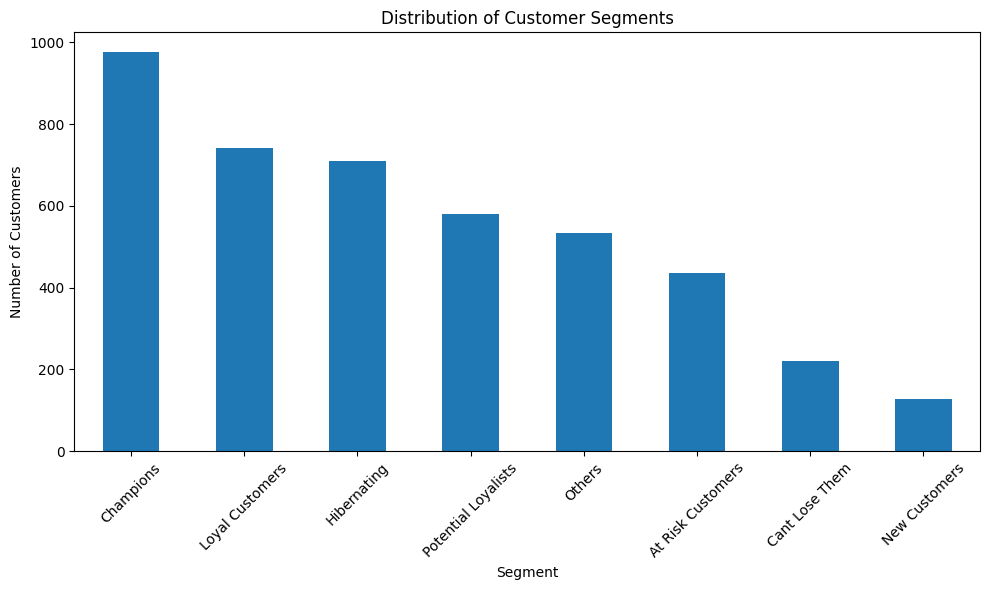

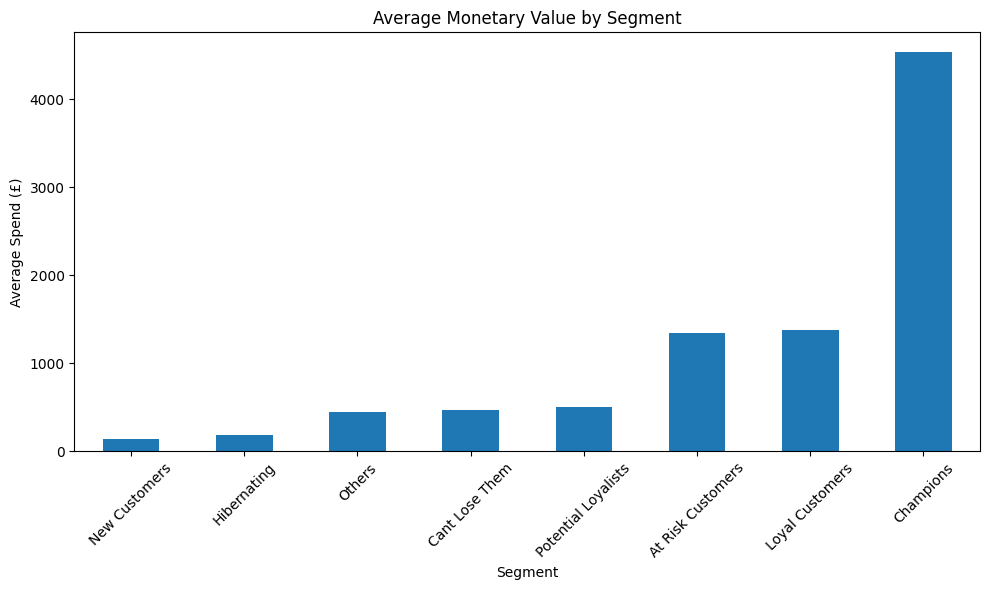

In [37]:
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
segment_metrics['MonetaryValue'].sort_values().plot(kind='bar')
plt.title('Average Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Spend (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Customer Segment Analysis & Insights
### Segment Profiles:

1. **Champions (976 customers)**:
   - Our most valuable customer segment
   - Very recent purchases (avg. recency of 11 days)
   - Highest purchase frequency (13 purchases on average)
   - Highest monetary value (£4,531 on average)
   - These are our loyal, high-spending customers who should be prioritized

2. **Loyal Customers (741 customers)**:
   - Good recency (33 days)
   - Moderate frequency (5 purchases)
   - Moderate spending (£1,380)
   - Solid repeat customers with growth potential

3. **Hibernating (709 customers)**:
   - Very inactive (220 days since last purchase)
   - Lowest frequency (1.1 purchases)
   - Low spending (£187)
   - These are at-risk customers who haven't purchased in a long time

4. **At Risk Customers (435)**:
   - Despite high monetary value (£1,340) and frequency (4.6), they haven't purchased in 138 days
   - They need immediate attention to prevent churn

5. **Cant Lose Them (221 customers)**:
   - These customers have the highest inactivity (265 days) but decent past spending
   - They represent valuable customers who haven't purchased recently and should be targeted for re-engagement

6. **New Customers (128)**:
   - Recent shoppers (17 days) with low frequency and spending
   - They represent our newest acquisitions with growth potential


### 7. Strategic Recommendations

Based on our customer segmentation analysis, here are targeted marketing strategies for each segment:

1. **Champions**:
   - VIP treatment and loyalty rewards
   - Early access to new products
   - Personal thank you messages
   - Referral incentives to leverage their network

2. **Loyal Customers**:
   - Loyalty programs to increase purchase frequency
   - Cross-sell related products
   - Personalized product recommendations
   - Exclusive discounts on premium items

3. **Hibernating**:
   - Re-engagement campaigns
   - Special "we miss you" discounts
   - Surveys to understand why they stopped shopping
   - Limited-time offers to create urgency

4. **At Risk Customers**:
   - Targeted win-back campaigns
   - Personalized offers based on past purchase history
   - Incentives for immediate purchase
   - Proactive customer service outreach

5. **Cant Lose Them**:
   - High-value win-back campaigns
   - Special offers based on past purchase history
   - Direct outreach if these are high-value customers
   - Consider phone calls for top spenders

6. **New Customers**:
   - Welcome series emails
   - Second purchase incentives
   - Educational content about your products
   - Follow-up surveys on first purchase experience
